In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.optimize as scopt

%matplotlib inline

In [2]:
def load_json(file):
    '''
    Loads txt file and returns json dict
    '''
    data = {}
    with open(file, encoding='utf-8') as f:
        for line in f:
            d = str(line).replace("'", '"')
            data = json.loads(d)

    return pd.DataFrame(data)

In [7]:
data = load_json('rss-data/rss-1517960202.670770.txt')
x1, y1 = (6.8, 6.8)
x2, y2 = (-.87, 9.45)
data['rss'] = pd.to_numeric(data['rss'])
data['d1'] = ((data['loc_x'] - x1)**2 + (data['loc_y'] - y1)**2)**0.5
data['d1_log'] = data['d1'].apply(np.log10)
data['d2'] = ((data['loc_x'] - x2)**2 + (data['loc_y'] - y2)**2)**0.5
data['d2_log'] = data['d2'].apply(np.log10)
data

,loc_x,loc_y,mac,rss,time,d1,d1_log,d2,d2_log
0,-0.590801,6.829330,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.390859,0.868695,2.635501,0.420863
1,-0.590787,6.829330,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.390845,0.868694,2.635502,0.420863
2,-0.590776,6.829330,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.390834,0.868693,2.635504,0.420864
3,-0.590748,6.829329,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.390807,0.868692,2.635507,0.420864
4,-0.589329,6.829317,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.389387,0.868608,2.635670,0.420891
5,-0.589151,6.829316,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.389209,0.868598,2.635690,0.420894
6,-0.588993,6.829314,ac:9e:17:7d:31:e8,-41,1.517960e+09,7.389051,0.868589,2.635708,0.420897
7,-0.588834,6.829313,ac:9e:17:7d:31:e8,-43,1.517960e+09,7.388893,0.868579,2.635726,0.420900
8,-0.588674,6.829312,ac:9e:17:7d:31:e8,-43,1.517960e+09,7.388732,0.868570,2.635745,0.420903
9,-0.588515,6.829310,ac:9e:17:7d:31:e8,-43,1.517960e+09,7.388573,0.868561,2.635763,0.420906


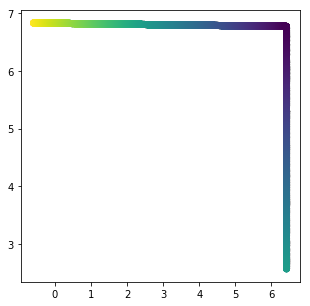

In [36]:
plt.figure(1, figsize=(5,5))
plt.scatter(data['loc_x'],data['loc_y'],c=data['d1'])
plt.show()

In [38]:
np.polyfit(data['d1_log'], data['rss'], 1)
# rss = 7.0311 - 53.6528 * log(distance)
# distance = 10**((rss - 7.0311)/(-53.6528))

array([  7.03114046, -53.65280988])

In [34]:
scopt.curve_fit(lambda t,a,b: a + b * np.log10(t),\
                data['d1'],  data['rss'])

(array([-53.6528099 ,   7.03114051]), array([[ 0.00468064, -0.00699959],
        [-0.00699959,  0.01581968]]))

In [39]:
scopt.curve_fit(lambda t,a,b: a + b * np.log10(t),\
                data['d2'],  data['rss'])

(array([-32.30021236, -24.96108957]), array([[ 0.01695739, -0.02186846],
        [-0.02186846,  0.02992395]]))